<a href="https://colab.research.google.com/github/volgasezen/di504/blob/main/Lab1/Intro_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="margin-bottom:0">DI 504: Fundementals of Deep Learning</h1>
<br>
<h3 style="margin-top:0">Lab 1: Introduction to PyTorch, Optimization and Neural Networks</h2>
<h4 style="margin-top:0">Given by Volga Sezen</h4>
<i>Thanks to Ayberk Aydın and Arif Ozan Kızıldağ for the feedback.</i>
<br>

-----------

PyTorch is an open source Python deep learning library originally developed by Meta AI (now under Linux Foundation) that supports CUDA, which is the general purpose GPU computing framework of NVIDIA.

PyTorch's low level design is intended to be similar to Numpy. It facilitates deep learning applications with its CUDA backend, automatic differentiation mechanism on computational graphs and its utilities for machine learning and deep learning.

## Instructions on running locally

If you want to follow along in your local environment, make sure you have a PC with an NVIDIA GPU or a Mac with an M series chipset.

If these types of hardware are not available to you, Google's Colab platform allows you to access GPUs and TPUs (Tensor Processing Units) for free*. If you are running on the Colab environment you can skip to the [Importing Packages](#importing-packages) portion.

**Which resources are available change with global usage. Resources are not guaranteed. Notebooks can run at most for 12 hours, and you can connect to a machine with a GPU a certain amount of times in a given period. (These aren't exact as they change, according to [Google](https://research.google.com/colaboratory/faq.html#usage-limits).)*

### NVIDIA Specific Instructions

If you have an NVIDIA GPU, you can check which version of CUDA is supported by running the command below. We can also see many details about the GPU installed.

In [1]:
!nvidia-smi

Thu Mar 13 11:29:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Once you know the CUDA version, you can visit this [guide](https://pytorch.org/get-started/locally/) and select the appropriate options to install PyTorch. Usually having the same major version is enough (12 in this case.)

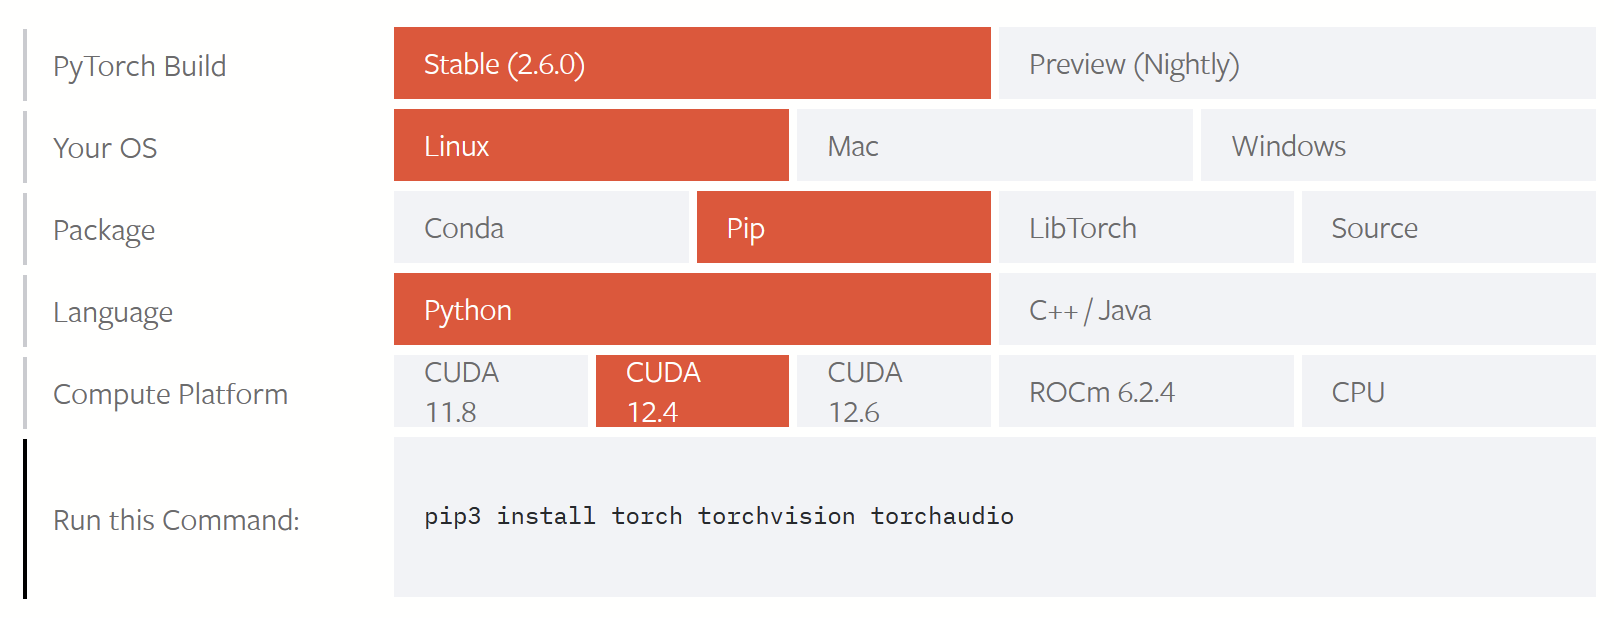

### Mac Specific Instructions

If you have a Mac with an M series chip you can simply install the default way and use the embedded GPU by accessing the "mps" framework. Please check the details [here](https://pytorch.org/docs/stable/notes/mps.html) as the lab is mainly focused on the CUDA backend.

## Importing Packages

In [2]:
import torch
import torchvision

print(f'torch version: {torch.__version__}')
print(f'torchvision version: {torchvision.__version__}')

torch version: 2.5.1+cu124
torchvision version: 0.20.1+cu124


**Note:** This notebook was last tested on **March 13th 2025** on the Google Colab environment. In any case of future updates to colab or pytorch, there might be issues. Version of pytorch and torchvision were printed for future reference.

## CUDA checks

In the Colab environment, PyTorch comes pre-installed with CUDA support. You can check if cuda is avaliable in current session by calling `torch.cuda.is_avaliable()` method.

If it returns `False`, you can change the runtime type by following these menus `Runtime -> Change runtime type -> Hardware Accelerator`, selecting a GPU or a TPU, and restarting the runtime.

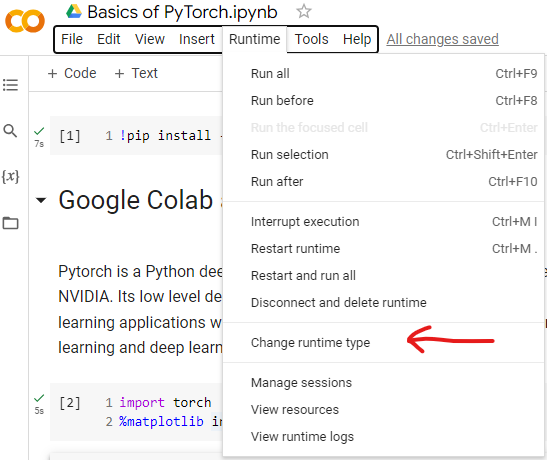

In [3]:
cuda_check = torch.cuda.is_available()

print(f'\033[1mTorch detected a CUDA compatible component:\033[0m {cuda_check}')

cuda_device_id = torch.cuda.current_device()
cuda_device = torch.cuda.get_device_name(cuda_device_id)

print(f'\033[1mName of the component:\033[0m {cuda_device}')

Torch detected a CUDA compatible component: True
Name of the component: Tesla T4


## Tensors

`torch.Tensor` is the main data structure of PyTorch. It holds the necesarry information for computation of created computational graphs in both forward and backward mode. Each tensor is an edge node in the computational graph.

With PyTorch, you can create tensors in the way that you create arrays in Numpy.

In [4]:
# You can initiate tensors manually, or with zeros, ones and rand methods

x1 = torch.zeros(1)
x2 = torch.rand(2,3)
x3 = torch.tensor(2)*2.5

print('\033[1m'+'1d tensor filled with a zero:'+'\033[0m')
print(x1)
print(x1.shape)
print('\033[1m'+'\nRandomly generated 2d tensor:'+'\033[0m')
print(x2)
print(x2.shape)
print('\033[1m'+'\nScalar tensor:'+'\033[0m')
print(x3)
print(x3.shape)

1d tensor filled with a zero:
tensor([0.])
torch.Size([1])

Randomly generated 2d tensor:
tensor([[0.9823, 0.3864, 0.6861],
        [0.5666, 0.4043, 0.9503]])
torch.Size([2, 3])

Scalar tensor:
tensor(5.)
torch.Size([])


You can see how the scalar tensor and 1d tensor have different shapes. This distinction matters as we can only take derivatives starting from a **scalar** value.

Also, you can apply mathematical operations on tensors just as other scientific computing libraries.

In [5]:
print('\033[1m'+'Sum of x2 and x3:'+'\033[0m')
print(x2 + x3)
print('\033[1m'+'\nTranspose of x3:'+'\033[0m')
print(x2.T)
print('\033[1m'+'\nShape of x2'+'\033[0m')
print(x2.shape)
print('\033[1m'+'\nShape of x2.T '+'\033[0m')
print(x2.T.shape)
print('\033[1m'+'\nMatrix multiplication of x2 and x2.T'+'\033[0m')
print(x2 @ x2.T) # @ is matrix multiplication operator. You can use .matmul() method as well.

Sum of x2 and x3:
tensor([[5.9823, 5.3864, 5.6861],
        [5.5666, 5.4043, 5.9503]])

Transpose of x3:
tensor([[0.9823, 0.5666],
        [0.3864, 0.4043],
        [0.6861, 0.9503]])

Shape of x2
torch.Size([2, 3])

Shape of x2.T 
torch.Size([3, 2])

Matrix multiplication of x2 and x2.T
tensor([[1.5850, 1.3648],
        [1.3648, 1.3876]])


## Derivatives with Autograd


PyTorch's autograd module lets you take derivatives of the leaf nodes in computational graphs by calling `.backward()` method of the scalar tensor to be differentiated.

By default, PyTorch does not keep gradients of newly created tensors, unless you specify it when defining a tensor.

In [6]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)/2
y.retain_grad()
print(x)
print(y)

tensor(1., requires_grad=True)
tensor(0.5000, grad_fn=<DivBackward0>)


PyTorch also keeps track of the operations that create tensors to apply chain rule at backward propagation. For example, y is created by a division while x is not. This means y is no longer a "leaf node" in our graph. To look at the gradients of intermediate nodes, we need to call the `.retain_grad()` method.

In [7]:
import torch.nn.functional as F

z = F.sigmoid(2*x + y)
print(z)

tensor(0.9241, grad_fn=<SigmoidBackward0>)


Here we have defined z as the following:

$$ z = \sigma(2x+y) $$

$$ \text{where} \ \sigma(x) = \frac{1}{1+e^{-x}} \ \text{(Sigmoid activation)}$$

When $x = 1$ and $y = \frac{1}{2} \implies z = 0.9241$

Let's take the partial derivative of $z$ with respect to $x$.

With the chain rule it can be expanded like so:

$$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial u} . \frac{\partial u}{\partial x} \ (\text{Where} \ u = 2x + y ) $$

1. The derivative of $z = \sigma(u)$ with respect to $u$ turns out to be $\sigma(u)(1-\sigma(u))$

2. And the derivative of $2x+y$ with respect to $x$ will just be $2$.

Multiplying these terms gives $ \frac{\partial z}{\partial x} = 2z(1-z)$

In [8]:
2*z*(1-z)

tensor(0.1402, grad_fn=<MulBackward0>)

Let's derive the result using autograd.

To take the derivative of z with respect to all parameters, we need to call the `backward()` method of the scalar tensor z. Afterwards, the autograd module will automatically populate the `grad` fields of the other tensors in computational graph.

In [9]:
z.backward()

In [10]:
2*z*(1-z) == x.grad

tensor(True)

In [11]:
z*(1-z) == y.grad

tensor(True)

### Derivatives in 2D tensors

This is the same when tensors grow bigger in dimensions. The same operation is being repeated for each item in the tensor.

In [12]:
x = torch.ones(2,3, requires_grad=True)*0.5
y = torch.ones(2,3, requires_grad=True)*-1
z = torch.ones(2,3, requires_grad=True)*0.5

x.retain_grad()
y.retain_grad()
z.retain_grad()

print(x)

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]], grad_fn=<MulBackward0>)


To keep things fresh, let's update our output function:

$$ j = \sigma(\text{relu}(2x+y)+3z) $$


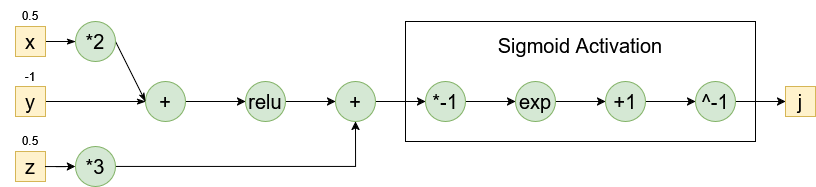

In [13]:
j = F.sigmoid(F.relu(2*x+y)+3*z)
print(j)

tensor([[0.8176, 0.8176, 0.8176],
        [0.8176, 0.8176, 0.8176]], grad_fn=<SigmoidBackward0>)


Notice that we need a function like mean to reduce the 2d tensor result down to a scalar.

In [14]:
j = torch.mean(j)
j.backward()
x.grad

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [15]:
torch.sum(z.grad)

tensor(0.4474)

Since the values of x and y were tensors filled with 1, the gradient of x is shared across all members equally.

## Tensor Operations on CUDA

Since PyTorch supports the CUDA backend, we can do tensor operations on NVIDIA CUDA cores without dealing with machine code. You can send tensors to the working memory of your GPU by calling the `.cuda()` method before defining them. (Setting the `device` keyword argument when defining tensors, models etc. also serves this purpose. It accepts strings such as 'cuda', 'mps' and 'cpu'.)

Once in the memory of a GPU, tensor operations will be carried out in the CUDA cores. This significantly improves performance of tasks where multiple operations need to be carried out, like neural network training, when compared to doing operations on CPU cores.

Let's compare the performance by first doing simple matrix multiplications on the CPU and tracking the time for each operation.

In [16]:
x = torch.rand(500, 700)
y = torch.rand(700, 900)

We will use the magic 'timeit' function of IPython for this task as the `time.time()` function is not precise enough. -o argument allows us to record the time of each run.

In [17]:
time_func = %timeit -n 1 -r 500 -o x @ y

The slowest run took 12.79 times longer than the fastest. This could mean that an intermediate result is being cached.
12.5 ms ± 8.68 ms per loop (mean ± std. dev. of 500 runs, 1 loop each)


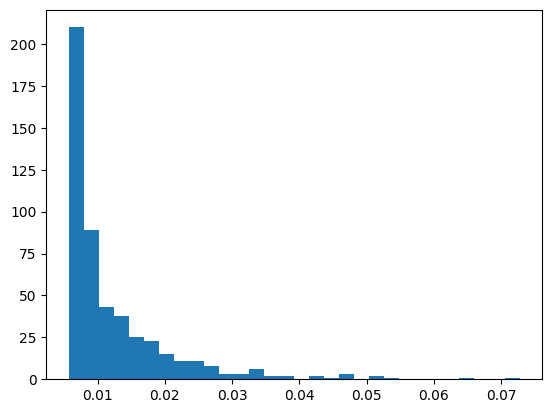

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(time_func.timings, bins=30);

On average each multiplication took 0.003 seconds, for a total of 2 seconds. Now we will repeat this with cuda tensors.

In [19]:
x = torch.rand(500, 700).cuda()
y = torch.rand(700, 900).cuda()

In [20]:
time_func_gpu = %timeit -n 1 -r 500 -o x @ y

The slowest run took 3268.88 times longer than the fastest. This could mean that an intermediate result is being cached.
154 µs ± 2.87 ms per loop (mean ± std. dev. of 500 runs, 1 loop each)


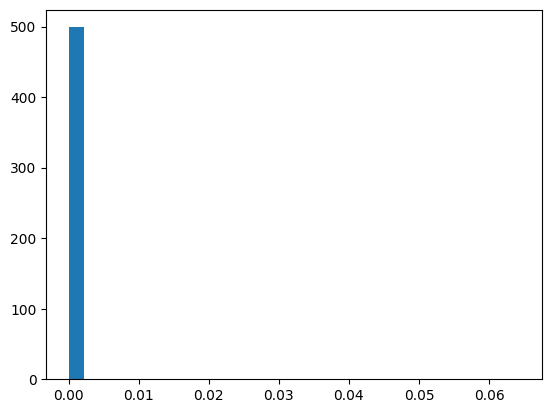

In [21]:
plt.hist(time_func_gpu.timings, bins=30);

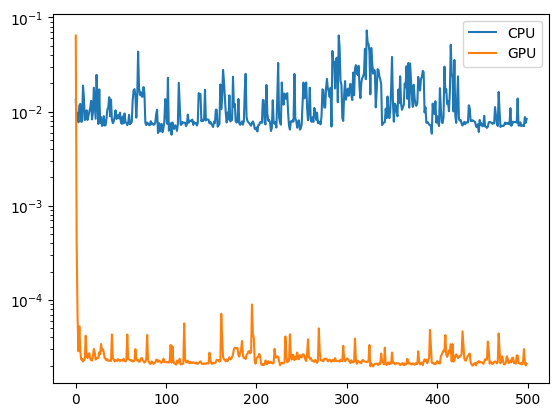

In [22]:
plt.plot(time_func.timings, label='CPU')
plt.plot(time_func_gpu.timings, label='GPU')
#plt.xscale('log')
plt.yscale('log')
plt.legend();

This took almost no time to finish. There are a few outliers in the first few runs. This accounts for the warmup time.

## Data Utilities

Aside from scientific computing, PyTorch has many utilities for handling data for machine learning and deep learning tasks. You can sample, shuffle, split and batch data as well as apply transformations on them.

We will be focusing on the MNIST dataset, and we will load it up from the `torchvision` library. By default the images will be in a different format, so we need to transform them to tensors using the ``transforms`` module.

MNIST is an (overly) famous computer vision dataset, where each image is a hand drawn digit. The goal is to identify common features among each drawing of a digit to identify future ones.

In [23]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

train_iter = MNIST(root='./',
                   transform=transforms.ToTensor(),
                   download=True,
                   train=True)

These predefined datasets have many methods, including `get_item` and `len`. For custom datasets you might use helper functions like ``ImageFolder`` or define them yourself*

*[PyTorch tutorial: Writing Custom Datasets, DataLoaders and Transforms](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [24]:
train_iter[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [25]:
len(train_iter)

60000

Let's define a simple function to display an image/label pair.

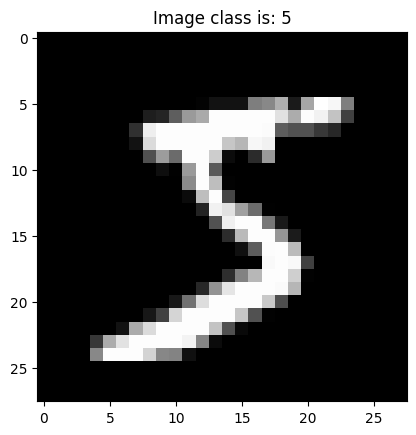

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(pair):
    im, lab = pair

    plt.imshow(im.squeeze().cpu().numpy(),
               cmap='gray')
    plt.title(f'Image class is: {lab}');

show_image(train_iter[0])

In deep learning it is common to do operations on batches of items, since GPU performance really shines when all cores are utilized by parallel operations. The `DataLoader` constructor allows us to do this for a defined dataset.

In [27]:
train_loader = DataLoader(train_iter,
                          batch_size=16,
                          shuffle=False)

next(iter(train_loader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

## Optimization

You can create optimizers by initializing the classes in `torch.optim` module with the parameters to be optimized (needs to be an iterable like a list), and optimizer specific hyperparameters such as learning rate and momentum.

Optimizers do not know anything about the optimized quantity. They can only access (and reset) the gradient fields (`.grad`) of the tensors in its `params` argument.

In this first part, we will find the optimum minima of the function $z = x^{2}$ with the x parameter initialized at 10. (Riveting stuff, I know.) With this demonstration the difference between an appropriate learning rate and a learning rate set too high will become apparent.

Let's first initialize our function, parameter, and the optimizer.

In [28]:
z_func = lambda x: x**2

x = torch.tensor(10.0, requires_grad=True)

optimizer = torch.optim.SGD(params=[x],
                            lr=0.1) # switch with 1.01 and 0.1

print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


Next we will define the optimization loop. This is very similar to how a neural network learns. Here, our z_func could be considered the loss function.

1. First we get the loss from our "network" response.
2. Then we clear the grad field of the optimizer to avoid accumulation of gradients (default behaviour).
3. Then as usual we call the backward method on z, which populates the grad field of the only parameter.
4. Finally, we take a gradient descent step with the optimizer. (Updating x with the gradient * learning rate.)

We will repeat these steps 100 times, saving z, x and the gradient of x along the way.

In [29]:
z_vals = []
x_vals = []
gradients = []

for i in range(100):

    #evaluate z at x
    z = z_func(x)
    z_vals.append(z.item())
    x_vals.append(x.item())

    #clear gradients to avoid accumulation
    optimizer.zero_grad()
    #calculate gradient of x wrt. z
    z.backward()
    gradients.append(x.grad.item())

    #take a gradient descent step, updating x
    optimizer.step()

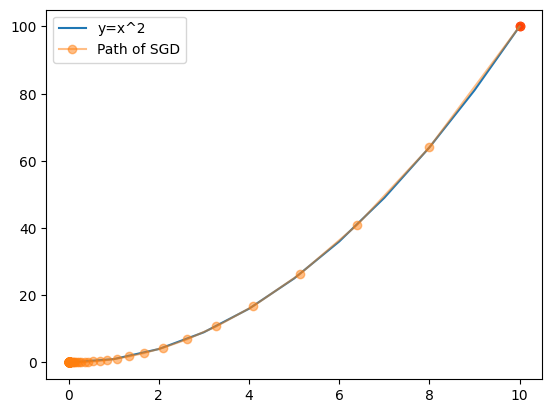

In [30]:
a, b = int(min(x_vals)), int(max(x_vals))+1

plt.plot(range(a,b),[x**2 for x in range(a,b)], label='y=x^2')
plt.plot(x_vals,z_vals, alpha=0.5, marker='o', label='Path of SGD')
plt.legend()
plt.scatter(x=10,y=100, c='r');

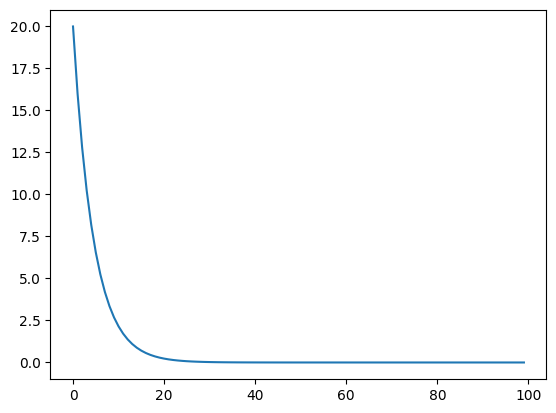

In [31]:
plt.plot(gradients);

## Two Variable Case

Now let's see what happens when the learning rate is not high enough in the two variable case.

In [32]:
my_function = lambda x,y: x**3 - y**3 + x**2 - y**2

x = torch.tensor(100.0, requires_grad=True)
y = torch.tensor(-100.0, requires_grad=True)

optimizer = torch.optim.SGD(params=[x, y],
                            lr=3.3e-3) # switch with 3.355e-3

In [33]:
z_vals = []
x_vals = []
gradients = []

for i in range(100):

    z = my_function(x, y)
    z_vals.append(z.item())
    x_vals.append(x.item())

    optimizer.zero_grad()

    z.backward()
    gradients.append(x.grad.item())

    optimizer.step()

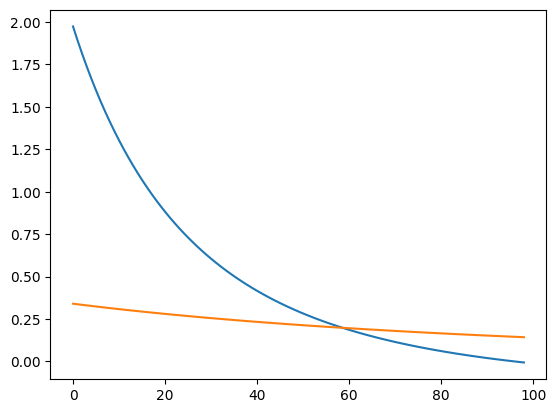

In [34]:
plt.plot(z_vals[1:])
plt.plot(x_vals[1:])

It is no secret that this function can produce negative values, but since our learning rate is not high enough, we are stuck in a local minima near zero. (Though it is actually a bit below 0, it is nowhere near the endless number of smaller minima.)

Try this with the learning rate specified in the inline comment and observe the values of z and x.

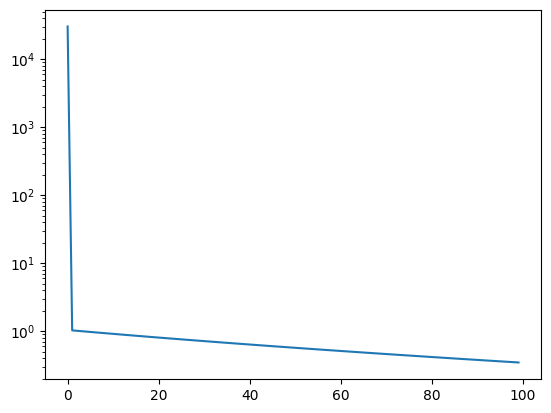

In [35]:
plt.plot(gradients)
plt.yscale('log')

## Neural Network Definition

To create neural networks with PyTorch, you need to create a Class that inherits `torch.nn.Module`. Then, you need to define the layers in the `__init__` method and define the forward propagation logic in `forward` method.

This class can be considered as a blueprint of the network. It specifies the shapes of its parameters, but does not initialize the parameters. The example below shows a single layer network with input size 784 and the output size 10. Most common layers are provided by `torch.nn` module.

In [36]:
import torch.nn.functional as F

class DumbNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(784, 10)

    def forward(self, x):
        x = self.layer1(x)
        return x

To initialize and instantiate a network from the blueprint, you can just use the class initialization syntax of Python, which is shown below.
Note that the `__init__` method can take arguments other than `self`, so you can define networks of the same blueprint with different hyperparameters.

We can also attach the `.cuda()` method to send the network parameters to our GPU, allowing for fast neural network training.

In [37]:
network = DumbNetwork().cuda()

print(network)

DumbNetwork(
  (layer1): Linear(in_features=784, out_features=10, bias=True)
)


In [38]:
input_data = torch.randn(16, 784).cuda() #dummy input to match the network's input shape
print(input_data.shape)

output = network(input_data)
print(output.shape)

torch.Size([16, 784])
torch.Size([16, 10])


In [39]:
print(output)

tensor([[-0.2045,  0.1774,  0.1296, -0.4799,  0.9888,  0.4403,  0.4686,  0.5442,
          0.0754,  0.7638],
        [-0.0864,  0.1100, -0.2003, -1.0112,  0.2901,  0.8634,  0.8850,  0.2895,
          0.1566,  0.2958],
        [-0.0476, -0.2152, -0.2713,  0.9759,  0.9068,  0.1629, -0.7144,  0.4374,
          1.0190, -0.4276],
        [ 0.2801, -0.9448,  0.2285,  0.2151, -0.7569, -0.1999, -1.4821,  0.1739,
         -0.0074,  0.3633],
        [ 0.2062, -0.0079, -0.9399,  0.3433, -0.9147, -0.3632,  0.2980, -0.8565,
         -1.6545,  1.1264],
        [-0.0404,  0.8568,  0.2964,  0.7417,  0.0501, -0.0294, -0.1387,  0.4465,
         -0.4563,  0.2921],
        [-0.0046,  0.6808, -0.2405,  0.1939, -0.6510,  1.0268, -0.1976,  1.1080,
          0.2868, -0.1342],
        [-0.0063, -0.5906,  0.8299, -0.8685, -0.1378,  0.1693, -0.4815,  0.4413,
         -0.2966,  0.4186],
        [-0.1775,  0.0431, -0.3104,  0.2062, -0.1806, -0.1242,  0.8562,  0.1455,
         -0.0386,  0.0390],
        [-0.5405,  

## Training the Neural Network

Now that we defined the network, and have a dataloader, let's define an optimizer and the loss function before training the model.

In [40]:
sgd_optimizer = torch.optim.SGD(network.parameters(),lr=0.001)

loss_fn = torch.nn.CrossEntropyLoss()

We will use the [`CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) function to understand how well or poorly the model classifies our handrwitten digits. This is the reason we didn't use the softmax function at our output, as this implementation automatically does it on raw logits.

Since the images were 28x28, we need to flatten them before sending it into our model. Images and labels will come from the dataloader we defined before.

In [41]:
loss_list = [] #To plot loss graph later

for train_images, train_labels in train_loader:
    # Move data to GPU
    train_images, train_labels = train_images.cuda(), train_labels.cuda()

    # Flatten the images from [BATCH, 1, 28, 28] to [BATCH, 784]
    flat_images = train_images.reshape(-1, 784)

    # Run the network with flattened images batch and obtain the class scores
    class_scores = network(flat_images)

    # Calculate loss using the loss_fn defined above
    loss = loss_fn(class_scores, train_labels)
    loss_list.append(loss.item())

    # 1-Clear gradients
    sgd_optimizer.zero_grad()

    # 2-Compute gradients using loss
    loss.backward()

    # 3-Take a gradient descent step using optimizer
    sgd_optimizer.step()

As shown on Autograd and Optimization sections, we calculate the loss, clear the accumulated gradients, calculate gradients by using the `backward()` method and taking an optimization step, updating all parameters of the network.

Since the network saw all training examples once, it is coommon to say the model was trained for 1 epoch. We can train for more epochs if the model has not converged yet.

To see the shape of the loss curve clearly we can define the following function:

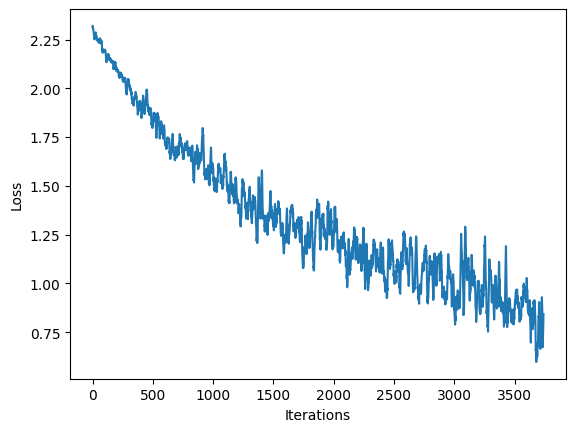

In [42]:
def plot_loss_graph(loss_lists):
    filter_size = 10
    moving_average_filter = [1/filter_size] * filter_size
    plt.figure()
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    for loss_list in loss_lists:
        smoothed_loss_list = np.convolve(loss_list, moving_average_filter, 'valid')
        plt.plot(smoothed_loss_list)

plot_loss_graph([loss_list])

Finally let's find out how well our model does at recognizing handwritten digits by calculating the accuracy on the test set.

In [43]:
mnist_test = MNIST('./', train=False,
                   download=True,
                   transform=transforms.ToTensor())

test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=False)

true_predictions = 0

for test_images, test_labels in test_dataloader:
    ## Move batch to GPU
    test_images, test_labels = test_images.cuda(), test_labels.cuda()

    ## Run the network with flattened images batch and obtain the class scores
    class_scores = network(test_images.reshape(-1, 784))

    ## Extract predictions from class_scores using torch.argmax() method
    class_predictions = torch.argmax(class_scores, dim=1)

    ## Find the number of true predictions in the batch using test_labels and class_predictions
    true_predictions_batch  = torch.sum(class_predictions == test_labels)

    true_predictions  += true_predictions_batch.item()

accuracy = true_predictions / len(mnist_test)

print(f'MNIST test set accuracy = {accuracy*100:.2f}%')


MNIST test set accuracy = 83.93%


## Bonus: SGD with Momentum

Momentum is a way of accelerating the SGD update rule by incorporating past gradient information. Momentum parameter controls how much of the past gradients are averaged to boost the gradient update signal.

Let's see how this affects our network training:

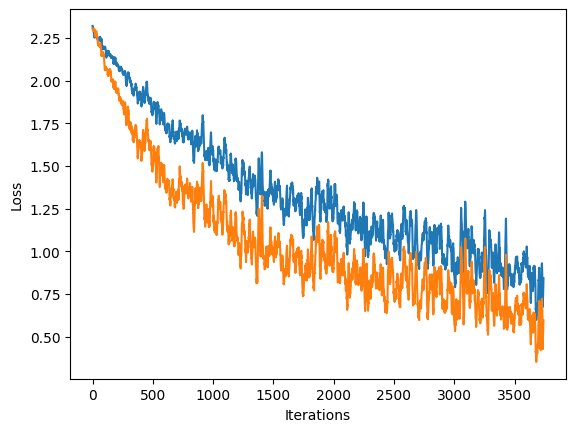

In [44]:
network = DumbNetwork().cuda()
sgd_optimizer = torch.optim.SGD(network.parameters(),lr=0.001,momentum=0.5)
loss_fn = torch.nn.CrossEntropyLoss()

loss_list2 = [] #To plot loss graph later

for train_images, train_labels in train_loader:
    # Move data to GPU
    train_images, train_labels = train_images.cuda(), train_labels.cuda()

    # Flatten the images from [BATCH, 1, 28, 28] to [BATCH, 784]
    flat_images = train_images.reshape(-1, 784)

    # Run the network with flattened images batch and obtain the class scores
    class_scores = network(flat_images)

    # Calculate loss using the loss_fn defined above
    loss = loss_fn(class_scores, train_labels)
    loss_list2.append(loss.item())

    # 1-Clear gradients
    sgd_optimizer.zero_grad()

    # 2-Compute gradients using loss
    loss.backward()

    # 3-Take a gradient descent step using optimizer
    sgd_optimizer.step()

plot_loss_graph([loss_list,loss_list2])

As you can see we overall took less iterations to reach the same loss level. In fact at the end we reached a better model. But remember, these loss values are based on the training set only. Let's also compare the test set performance to be sure.

In [45]:
true_predictions = 0
all_predictions = 0
for test_images, test_labels in test_dataloader:
    ## Move batch to GPU
    test_images, test_labels = test_images.cuda(), test_labels.cuda()

    ## Run the network with flattened images batch and obtain the class scores
    class_scores = network(test_images.reshape(-1, 784))

    ## Extract predictions from class_scores using torch.argmax() method
    class_predictions = torch.argmax(class_scores, dim=1)

    ## Find the number of true predictions in the batch using test_labels and class_predictions
    true_predictions_batch  = torch.sum(class_predictions == test_labels)

    true_predictions  += true_predictions_batch.item()
    all_predictions += len(test_labels)

accuracy = true_predictions / all_predictions

print(f'MNIST test set accuracy = {accuracy*100:.2f}%')


MNIST test set accuracy = 86.14%


There is also an improvement here. Is this statistically significant? That is another question to consider.

-------------

This is the end of our first lab! If you have any questions, please feel free to reach out via email, or visit my office.